# Dynamic Programming

We will be using dynamic programming on sample 4x4 grid world and study **Policy Evaluation** 

![GridWorld](./images/gridworld.png "Grid World")


### Policy Iteration (Prediction)

Policy iteration is carried out by converting Bellman Expectation equation for state values to an iterative assignment equation. The backup digram is given below. Pseudo code for the algorithm is given in Fig 3-3

![Bellman backup](./images/policy_iteration_backup.png "Bellman Backup")


In [1]:
# Initial imports and enviroment setup
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# create grid world invironment
from gridworld import GridworldEnv
env = GridworldEnv()

In [2]:
# Policy Iteration

def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Evaluate a policy given an environment.

    Args:
        policy:[S, A]shaped matrix representing the policy. Random in our case
        env: OpenAI env. env.P -> transition dynamics of the environment.
            env.P[s][a] [(prob, next_state, reward, done)].
            env.nS is number of states in the environment.
            env.nA is number of actions in the environment.
        theta: Stop iteration once value function change is
            less than theta for all states.
        discount_factor: Gamma discount factor.

    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with a (all 0) value function
    V = np.zeros(env.nS)
    V_new = np.copy(V)
    while True:
        delta = 0
        # For each state, perform a "backup"
        for s in range(env.nS):
            v = 0
            # Look at the possible next actions
            for a, pi_a in enumerate(policy[s]):
                # For each action, look at the possible next states...
                for prob, next_state, reward, done in env.P[s][a]:
                    # Calculate the expected value as per backup diagram
                    v += pi_a * prob * \
                        (reward + discount_factor * V[next_state])
            # How much our value function changed (across any states)
            V_new[s] = v
            delta = max(delta, np.abs(V_new[s] - V[s]))
        V = np.copy(V_new)
        # Stop if change is below a threshold
        if delta < theta:
            break
    return np.array(V)

In [3]:
# Custom print to show state values inside the grid
def grid_print(V, k=None):
    ax = sns.heatmap(V.reshape(env.shape),
                     annot=True, square=True,
                     cbar=False, cmap='Blues',
                     xticklabels=False, yticklabels=False)

    if k:
        ax.set(title="K = {0}".format(k))
    plt.show()

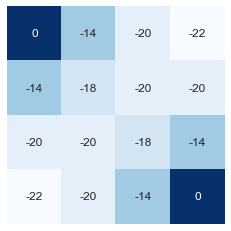

In [4]:
# Create a random policy
random_policy = np.ones([env.nS, env.nA]) / env.nA

# run policy iteration for random policy
V_pi = policy_eval(random_policy, env, discount_factor=1.0, theta=0.00001)

# Print policy
grid_print(V_pi.reshape(env.shape))

### Convergence

Let us now study the convergence of values as we iterate. We will modify `policy_eval` to print the values of states as we iterate. 

In [5]:
def policy_eval_withprint(
    policy, env,
    discount_factor=1.0,
    theta=0.00001,
    print_at=[]
):
    """
    Evaluate a policy given an environment and
    a full description of the environment's dynamics.

    Args:
        policy: [S, A]shaped matrix representing the policy. Random in our case
        env: OpenAI env. env.P -> transition dynamics of the environment.
            env.P[s][a] [(prob, next_state, reward, done)].
            env.nS is number of states in the environment.
            env.nA is number of actions in the environment.
        theta: Stop evaluation once value function change is
            less than theta for all states.
        discount_factor: Gamma discount factor.

    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with a (all 0) value function
    k = 0
    V = np.zeros(env.nS)
    V_new = np.copy(V)
    while True:
        k += 1
        delta = 0
        # For each state, perform a "backup"
        for s in range(env.nS):
            v = 0
            # Look at the possible next actions
            for a, pi_a in enumerate(policy[s]):
                # For each action, look at the possible next states...
                for prob, next_state, reward, done in env.P[s][a]:
                    # Calculate the expected value as per backup diagram
                    v += pi_a * prob * \
                        (reward + discount_factor * V[next_state])
            # How much our value function changed (across any states)
            V_new[s] = v
            delta = max(delta, np.abs(V_new[s] - V[s]))

        V = np.copy(V_new)
        # print grid for specified iteration values
        if k in print_at:
            grid_print(V.reshape(env.shape), k=k)
        # Stop if change is below a threshold
        if delta < theta:
            break
    grid_print(V.reshape(env.shape), k=k)
    return np.array(V)

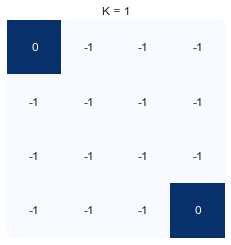

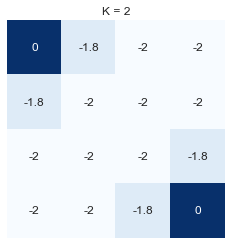

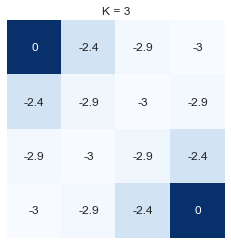

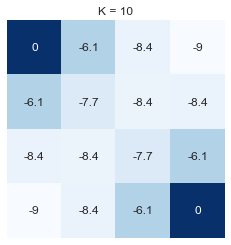

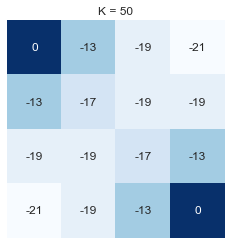

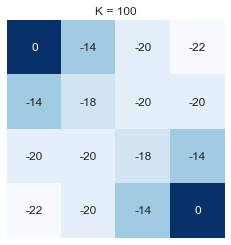

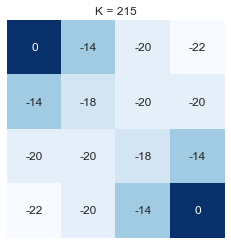

In [6]:
# run policy iteration for random policy and print interim state values
V_pi = policy_eval_withprint(
        random_policy,
        env,
        discount_factor=1.0,
        theta=0.00001,
        print_at=[1, 2, 3, 10, 50, 100])

### Conclusion

We see that state values start with -1 after first iteration. And then they slowly start to converge to the value $ V_{\pi}(S) $. By 50 iteration, they are fairly close. By 100th iteration, the values differ only in decimal values. Finally it takes about 200 iterations for the values to converge wherein the change in values during an iteration falls below the specified threshold 0.00001.